# Regression notebook

In [1]:
#Loading the data
import csv

# open the file in universal line ending mode 
#the file called 2015_tree_data_updated.csv is exactly the same download for the first assignment, jusr re-named.
#This file is not included in the repo because is very big
with open('2015_tree_data_updated.csv', 'r') as infile:
    # read the file as a dictionary for each row ({header : value})
    reader = csv.DictReader(infile)
    data = {} #empty set
    for row in reader:
        for header, value in row.items():
            try:
                data[header].append(value)
            except KeyError:
                data[header] = [value]
Diameter = data['Diameter']
Health = data['Health']
Spc_Latin = data['Spc_Latin']
Spc_Common = data['Spc_Common']
Sidewalk_Condition = data['Sidewalk_Condition']
problems = data['problems']
root_stone = data['root_stone']
root_grate = data['root_grate']
root_other = data['root_other']
trunk_wire = data['trunk_wire']
trnk_light = data['trnk_light']
trnk_other = data['trnk_other']
brch_light = data['brch_light']
brch_shoe = data['brch_shoe']
brch_other = data['brch_other']
Address = data['Address']
Zipcode = data['Zipcode']
CB = data['CB']
Borough = data['Borough']
Latitude = data['Latitude']
Longitude = data['Longitude']
neigh = data['Neighbourhoods']

The aim is to compute the avg diameter, amount of trees, avg house price and then air pollution for each neighboorhood.

In [2]:
dic_neigh_count = {}
for n in neigh: 
    dic_neigh_count[n] = 0

n_dic = {}
n_list = list(set(list(neigh)))
for n in n_list:
    n_dic[n] = []
i = 0
for n in neigh: 
    n_dic[n].append(i)
    i += 1

#avg diameter in each neighboorhood
index = 0
dic_n = {}
dic_n_count = {}
for n in list(set(list(neigh))):
    dic_n[n] = 0
    dic_n_count[n] = 0

for d in Diameter:
    #if int(CB[index])<400 and int(CB[index])>299: 
    dic_n[neigh[index]] += float(d)
    dic_n_count[neigh[index]] += 1
    index += 1
for k in dic_n.keys(): 
    if dic_n_count[k] <> 0:
        dic_n[k] = float(dic_n[k]/dic_n_count[k])

In [4]:
with open('AirPollution/Modified/NO2.csv', 'r') as infile:
    # read the file as a dictionary for each row ({header : value})
    reader = csv.DictReader(infile)
    data = {} #empty set
    for row in reader:
        for header, value in row.items():
            try:
                data[header].append(value)
            except KeyError:
                data[header] = [value]

boro_airno2 = data['Borough']
geo_id_airno2 = data['Geography']
geo_airno2 = data['Geography_id']
mean_no2_airno2 = data['Mean (ppb)']

dic_no2 = {}
i = 0
for d in geo_airno2: 
    dic_no2[d] = mean_no2_airno2[i]
    i += 1

with open('AirPollution/Modified/O3.csv', 'r') as infile:
    # read the file as a dictionary for each row ({header : value})
    reader = csv.DictReader(infile)
    data = {} #empty set
    for row in reader:
        for header, value in row.items():
            try:
                data[header].append(value)
            except KeyError:
                data[header] = [value]

boro_airo3 = data['Borough']
geo_id_airo3 = data['Geography']
geo_airo3 = data['Geography_id']
mean_air03 = data['Mean (ppb)']

dic_o3 = {}
i = 0
for d in geo_airo3: 
    dic_o3[d] = mean_air03[i]
    i += 1

with open('AirPollution/Modified/PM25.csv', 'r') as infile:
    # read the file as a dictionary for each row ({header : value})
    reader = csv.DictReader(infile)
    data = {} #empty set
    for row in reader:
        for header, value in row.items():
            try:
                data[header].append(value)
            except KeyError:
                data[header] = [value]

boro_airpm25 = data['Borough']
geo_id_airpm25 = data['Geography']
geo_airpm25 = data['Geography_id']
mean_airpm25 = data['Mean (mcg per cubic meter)']

dic_pm25 = {}
i = 0
for d in geo_airpm25: 
    dic_pm25[d] = mean_airpm25[i]
    i += 1



with open('AirPollution/Modified/Black_Carbon.csv', 'r') as infile:
    # read the file as a dictionary for each row ({header : value})
    reader = csv.DictReader(infile)
    data = {} #empty set
    for row in reader:
        for header, value in row.items():
            try:
                data[header].append(value)
            except KeyError:
                data[header] = [value]

boro_airpmbc = data['Borough']
geo_id_airbc = data['Geography']
geo_airbc = data['Geography_id']
mean_no2_airbc = data['Mean (absorbance units)']

dic_bc = {}
i = 0
for d in geo_airbc: 
    dic_bc[d] = mean_no2_airbc[i]
    i += 1

In [5]:
dic_n_cb = {}
#initiailize dictionary with list of neigh
for n in list(set(list(neigh))): 
    dic_n_cb[n] = 'E'

unique_n_list = list(set(list(neigh)))
list_n_done = []
len_unique_n_list = len(unique_n_list)

i = 0 
list_cb = []
list_boro = []
list_n = []

i = 0
for n in neigh: 
    if n not in list_n_done:
        list_n.append(n)
        list_n_done.append(n)
        list_cb.append(CB[i])
        list_boro.append(Borough[i])
    i += 1
    
dic_n_no2 = {}
dic_n_o3 = {}
dic_n_pm25 = {}
dic_n_bc = {}
list_no2 = []
list_o3 = []
list_pm25 = []
list_bc = []

for x in list_cb: 
    list_no2.append(float(dic_no2[x]))
    list_o3.append(float(dic_o3[x]))
    list_pm25.append(float(dic_pm25[x]))
    list_bc.append(float(dic_bc[x]))

In [6]:
i = 0
for n in list_n: 
    dic_n_no2[n] = list_no2[i]
    dic_n_o3[n] = list_o3[i]
    dic_n_pm25[n] = list_pm25[i]
    dic_n_bc[n] = list_bc[i]
    i += 1

In [7]:
input_tuple = []
for n in list_n: 
    input_tuple.append([float(dic_n[n]), float(dic_n_count[n])])

In [8]:
import csv
with open('AirPollutionLabeledPoint.csv', 'wb') as csvfile:
    crimewriter = csv.writer(csvfile)
    crimewriter.writerow(('Borough', 'CB', 'Neighbourhood'))
    for xd, yd, zd in zip(list_boro, list_cb, list_n):
        crimewriter.writerow( (xd, yd, zd ) )
    csvfile.close()

In [10]:
#output air pollution lists
with open('AirPollution_Mod.csv', 'wb') as csvfile:
    crimewriter = csv.writer(csvfile)
    crimewriter.writerow(('Borough', 'CB', 'Neighbourhood', 'NO2', 'O3', 'PM25', 'BC'))
    for lb, lc, ln, xd, yd, zd, hd in zip(list_boro, list_cb, list_n, list_no2, list_o3, list_pm25, list_bc):
        crimewriter.writerow( ( lb, lc, ln, xd, yd, zd, hd ) )
    csvfile.close()

In [12]:
import numpy as np
input_tuple1 = []
input_tuple2 = []
for n in list_n: 
    input_tuple1.append(float(dic_n[n]))
    input_tuple2.append(float(dic_n_count[n]))
    
#output air pollution lists
with open('AirPollutionCSV/Diameter.csv', 'wb') as csvfile:
    crimewriter = csv.writer(csvfile)
    crimewriter.writerow(('Borough', 'CB', 'Neighbourhood', 'Diameter'))
    for lb, lc, ln, xd in zip(list_boro, list_cb, list_n, input_tuple1):
        crimewriter.writerow( ( lb, lc, ln, xd ) )
    csvfile.close()

#output air pollution lists
with open('AirPollutionCSV/TreesAmount.csv', 'wb') as csvfile:
    crimewriter = csv.writer(csvfile)
    crimewriter.writerow(('Borough', 'CB', 'Neighbourhood', 'TreesAmount'))
    for lb, lc, ln, xd in zip(list_boro, list_cb, list_n, input_tuple2):
        crimewriter.writerow( ( lb, lc, ln, xd ) )
    csvfile.close()

Beta= [[-0.56313229]] 
Alpha= [ 26.72807853]


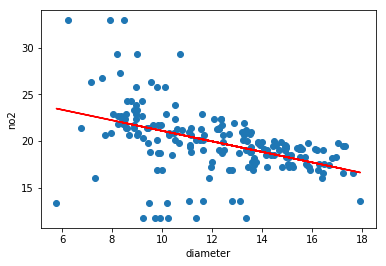

Beta= [[-0.00101366]] 
Alpha= [ 22.78199381]


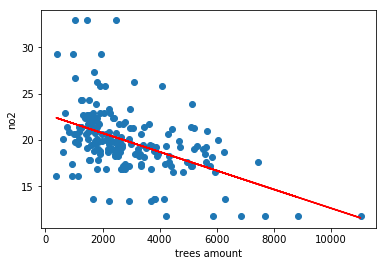

Beta= [[ 0.34349687]] 
Alpha= [ 26.98769928]


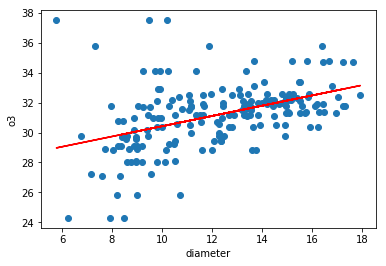

Beta= [[ 0.00049559]] 
Alpha= [ 29.74361677]


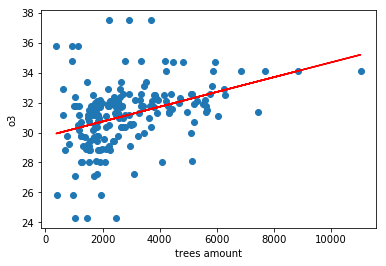

Beta= [[-0.19229345]] 
Alpha= [ 11.23265592]


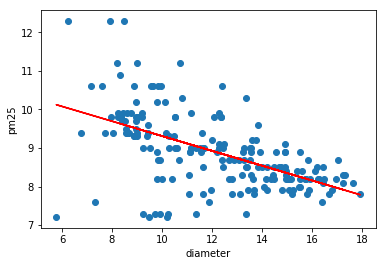

Beta= [[-0.00026078]] 
Alpha= [ 9.64251134]


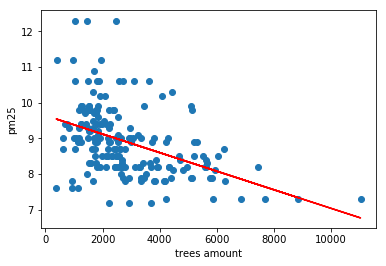

Beta= [[-0.05288274]] 
Alpha= [ 1.59865936]


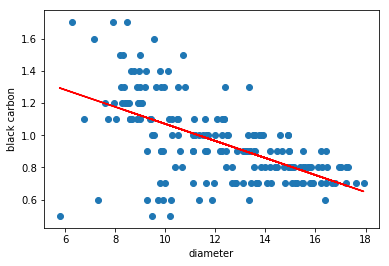

Beta= [[ -6.46151812e-05]] 
Alpha= [ 1.14115808]


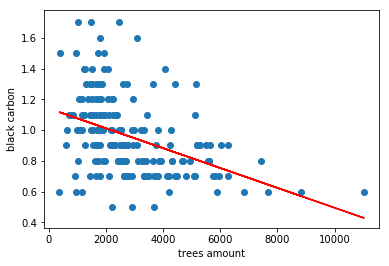

In [13]:
#Define a function to multiply a scalar with a vector
def scalar_multiply(c, v):
    """c is a number, v is a vector"""
    return [c * v_i for v_i in v]

import matplotlib
import matplotlib.pylab as plt

coeff_diam = []
intercept_diam = []
coeff_treesAmount = []
intercept_treesAmount = []

fig, ax1 = plt.subplots()
ax1.set_xlabel('diameter')
ax1.set_ylabel('no2')
ax1.scatter(np.asarray(input_tuple1), np.asarray(list_no2))
from sklearn import linear_model
reg = linear_model.LinearRegression()
self_lin = reg.fit(np.asarray(input_tuple1).reshape(-1,1), np.asarray(list_no2).reshape(-1,1)) #reshape arrays
coeff_diam.append(reg.coef_)
intercept_diam.append(reg.intercept_)
print "Beta=", reg.coef_, 
print ""
print "Alpha=", reg.intercept_
plt.plot(input_tuple1, scalar_multiply(reg.coef_[0][0], input_tuple1) + reg.intercept_[0], color='red')
plt.show()
fig, ax2 = plt.subplots()
ax2.set_xlabel('trees amount')
ax2.set_ylabel('no2')
ax2.scatter(np.asarray(input_tuple2), np.asarray(list_no2))
reg = linear_model.LinearRegression()
self_lin = reg.fit(np.asarray(input_tuple2).reshape(-1,1), np.asarray(list_no2).reshape(-1,1)) #reshape arrays
coeff_treesAmount.append(reg.coef_)
intercept_treesAmount.append(reg.intercept_)
print "Beta=", reg.coef_, 
print ""
print "Alpha=", reg.intercept_
plt.plot(input_tuple2, scalar_multiply(reg.coef_[0][0], input_tuple2) + reg.intercept_[0], color='red')
plt.show()

fig, ax = plt.subplots()
ax.set_xlabel('diameter')
ax.set_ylabel('o3')
ax.scatter(np.asarray(input_tuple1), np.asarray(list_o3))
reg = linear_model.LinearRegression()
self_lin = reg.fit(np.asarray(input_tuple1).reshape(-1,1), np.asarray(list_o3).reshape(-1,1)) #reshape arrays
coeff_diam.append(reg.coef_)
intercept_diam.append(reg.intercept_)
print "Beta=", reg.coef_, 
print ""
print "Alpha=", reg.intercept_
plt.plot(input_tuple1, scalar_multiply(reg.coef_[0][0], input_tuple1) + reg.intercept_[0], color='red')
plt.show()
fig, ax = plt.subplots()
ax.set_xlabel('trees amount')
ax.set_ylabel('o3')
ax.scatter(np.asarray(input_tuple2), np.asarray(list_o3))
reg = linear_model.LinearRegression()
self_lin = reg.fit(np.asarray(input_tuple2).reshape(-1,1), np.asarray(list_o3).reshape(-1,1)) #reshape arrays
coeff_treesAmount.append(reg.coef_)
intercept_treesAmount.append(reg.intercept_)
print "Beta=", reg.coef_, 
print ""
print "Alpha=", reg.intercept_
plt.plot(input_tuple2, scalar_multiply(reg.coef_[0][0], input_tuple2) + reg.intercept_[0], color='red')
plt.show()

fig, ax = plt.subplots()
ax.set_xlabel('diameter')
ax.set_ylabel('pm25')
ax.scatter(np.asarray(input_tuple1), np.asarray(list_pm25))
reg = linear_model.LinearRegression()
self_lin = reg.fit(np.asarray(input_tuple1).reshape(-1,1), np.asarray(list_pm25).reshape(-1,1)) #reshape arrays
coeff_diam.append(reg.coef_)
intercept_diam.append(reg.intercept_)
print "Beta=", reg.coef_, 
print ""
print "Alpha=", reg.intercept_
plt.plot(input_tuple1, scalar_multiply(reg.coef_[0][0], input_tuple1) + reg.intercept_[0], color='red')
plt.show()
fig, ax = plt.subplots()
ax.set_xlabel('trees amount')
ax.set_ylabel('pm25')
ax.scatter(np.asarray(input_tuple2), np.asarray(list_pm25))
reg = linear_model.LinearRegression()
self_lin = reg.fit(np.asarray(input_tuple2).reshape(-1,1), np.asarray(list_pm25).reshape(-1,1)) #reshape arrays
coeff_treesAmount.append(reg.coef_)
intercept_treesAmount.append(reg.intercept_)
print "Beta=", reg.coef_, 
print ""
print "Alpha=", reg.intercept_
plt.plot(input_tuple2, scalar_multiply(reg.coef_[0][0], input_tuple2) + reg.intercept_[0], color='red')
plt.show()

fig, ax = plt.subplots()
ax.set_xlabel('diameter')
ax.set_ylabel('black carbon')
ax.scatter(np.asarray(input_tuple1), np.asarray(list_bc))
reg = linear_model.LinearRegression()
self_lin = reg.fit(np.asarray(input_tuple1).reshape(-1,1), np.asarray(list_bc).reshape(-1,1)) #reshape arrays
coeff_diam.append(reg.coef_)
intercept_diam.append(reg.intercept_)
print "Beta=", reg.coef_, 
print ""
print "Alpha=", reg.intercept_
plt.plot(input_tuple1, scalar_multiply(reg.coef_[0][0], input_tuple1) + reg.intercept_[0], color='red')
plt.show()
fig, ax = plt.subplots()
ax.set_xlabel('trees amount')
ax.set_ylabel('black carbon')
ax.scatter(np.asarray(input_tuple2), np.asarray(list_bc))
reg = linear_model.LinearRegression()
self_lin = reg.fit(np.asarray(input_tuple2).reshape(-1,1), np.asarray(list_bc).reshape(-1,1)) #reshape arrays
coeff_treesAmount.append(reg.coef_)
intercept_treesAmount.append(reg.intercept_)
print "Beta=", reg.coef_, 
print ""
print "Alpha=", reg.intercept_
plt.plot(input_tuple2, scalar_multiply(reg.coef_[0][0], input_tuple2) + reg.intercept_[0], color='red')
plt.show()

In [14]:
with open('AirPollutionCSV/CoeffInterDiam.csv', 'wb') as csvfile:
    crimewriter = csv.writer(csvfile)
    crimewriter.writerow(('Coeff', 'Intercept'))
    for xd, yd in zip(coeff_diam, intercept_diam):
        crimewriter.writerow( ( float(xd), float(yd) ) )
    csvfile.close()
with open('AirPollutionCSV/CoeffInterTreesAmount.csv', 'wb') as csvfile:
    crimewriter = csv.writer(csvfile)
    crimewriter.writerow(('Coeff', 'Intercept'))
    for xd, yd in zip(coeff_treesAmount, intercept_treesAmount):
        crimewriter.writerow( ( float(xd), float(yd) ) )
    csvfile.close()

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import model_selection
from sklearn import linear_model
from sklearn.metrics import r2_score
alpha = 0.2

X_train, X_test, y_train, y_test = model_selection.train_test_split(input_tuple
                                                    , list_no2
                                                    , test_size=0.25, random_state=42)

from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha=alpha, l1_ratio=0.7)

y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print("r^2 elastic net on test data : %f" % r2_score_enet)
print("Mean squared error: %.2f"
      % np.mean((enet.predict(X_test) - y_test) ** 2))

from sklearn.linear_model import Lasso
alpha = 0.3
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
#print(lasso)
print("Mean squared error: %.2f"
      % np.mean((lasso.predict(X_test) - y_test) ** 2))
print("r^2 lasso on test data : %f" % r2_score_lasso)

reg = linear_model.LinearRegression()
self_mul = reg.fit(X_train, y_train).predict(X_test)
print("Mean squared error: %.2f"
      % np.mean((reg.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score (ols): %.2f' % reg.score(X_test, y_test))

r^2 elastic net on test data : 0.509594
Mean squared error: 5.42
Mean squared error: 5.36
r^2 lasso on test data : 0.515746
Mean squared error: 5.52
Variance score (ols): 0.50
